# DICOM SEG

This example demonstrates how to read DICOM CT volumes with and DICOM SEG, AI-generated segmentations, with [ITK-Wasm](https://wasm.itk.org). Data is pulled from the [NIH Imaging Data Commons (IDC)](https://portal.imaging.datacommons.cancer.go).

You can run this notebook locally or with any of the following platforms: 
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/InsightSoftwareConsortium/itkwidgets/blob/main/examples/integrations/itkwasm/DICOM_SEG.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/InsightSoftwareConsortium/itkwidgets/HEAD?labpath=examples%2Fintegrations%2Fitkwasm%2FDICOM_SEG.ipynb)
[![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github.com/InsightSoftwareConsortium/itkwidgets/blob/main/examples/integrations/itkwasm/DICOM_SEG.ipynb)

In [2]:
import sys

!{sys.executable} -m pip install -q "itkwidgets[all]>=1.0a53" idc-index itkwasm-dicom

In [3]:
from pathlib import Path
import glob
from itkwidgets import view
from itkwasm_dicom import read_segmentation, read_image_dicom_file_series

## Segmentation of lung cancer from CT series

In [6]:
# CT series downloaded from TCIA / IDC, NSCLC Radiogenomics collection, https://www.cancerimagingarchive.net/collection/nsclc-radiogenomics/#citations
# Bakr, S., Gevaert, O., Echegaray, S., Ayers, K., Zhou, M., Shafiq, M., Zheng, H., Zhang, W., Leung, A., Kadoch, M., Shrager, J., Quon, A., Rubin, D., Plevritis, S., & Napel, S. (2017). Data for NSCLC Radiogenomics (Version 4) [Data set]. The Cancer Imaging Archive. https://doi.org/10.7937/K9/TCIA.2017.7hs46erv
!idc download 1.3.6.1.4.1.14519.5.2.1.4334.1501.193624308604131216732637940838
# Segmentation of this series downloaded from TCIA, IDC, BAMF under the AIMI Annotations initiative (https://zenodo.org/doi/10.5281/zenodo.8345959)
!idc download 1.2.276.0.7230010.3.1.3.17436516.2700181.1720647744.757708

2024-10-21 19:15:03,278 - Downloading from IDC v19 index
2024-10-21 19:15:03,371 - Identified matching SeriesInstanceUID: ['1.3.6.1.4.1.14519.5.2.1.4334.1501.193624308604131216732637940838']
2024-10-21 19:15:03,386 - Total free space on disk: 47.984467968 GB
2024-10-21 19:15:03,442 - Not using s5cmd sync as the destination folder is empty or sync or progress bar is not requested
2024-10-21 19:15:03,442 - Initial size of the directory: 0 bytes
2024-10-21 19:15:03,443 - Approximate size of the files that need to be downloaded: 138.68 MB
2024-10-21 19:15:05,457 - Successfully downloaded files to /home/paul/src/itkwidgets-stuff/itkwidgets/examples/integrations/itkwasm
2024-10-21 19:15:08,299 - Downloading from IDC v19 index
2024-10-21 19:15:08,398 - Identified matching SeriesInstanceUID: ['1.2.276.0.7230010.3.1.3.17436516.2700181.1720647744.757708']
2024-10-21 19:15:08,417 - Total free space on disk: 47.84543744 GB
2024-10-21 19:15:08,483 - Not using s5cmd sync as the destination folder is

In [8]:
ct_image_files = glob.glob('./nsclc_radiogenomics/AMC-010/1.3.6.1.4.1.14519.5.2.1.4334.1501.116565501097532779730890753589/CT_1.3.6.1.4.1.14519.5.2.1.4334.1501.193624308604131216732637940838/*')
ct_image, sorted_file_names = read_image_dicom_file_series(ct_image_files)

In [9]:
seg_file_name = './nsclc_radiogenomics/AMC-010/1.3.6.1.4.1.14519.5.2.1.4334.1501.116565501097532779730890753589/SEG_1.2.276.0.7230010.3.1.3.17436516.2700181.1720647744.757708/1e7767a6-46f6-4685-a248-ac0eec8a0b98.dcm'
seg_image, seg_info = read_segmentation(seg_file_name)

Row direction: 1 0 0
Col direction: 0 1 0
Z direction: 0 0 1
Total frames: 76
Total frames with unique IPP: 76
Total overlapping frames: 0
Origin: [-348.177, -348.177, -454.93]
Slice extent: 245.25
Slice spacing: 3.26999
Image Orientation Patient set to : 1, 0, 0, 0, 1, 0
Identified 1 groups of non-overlapping segments



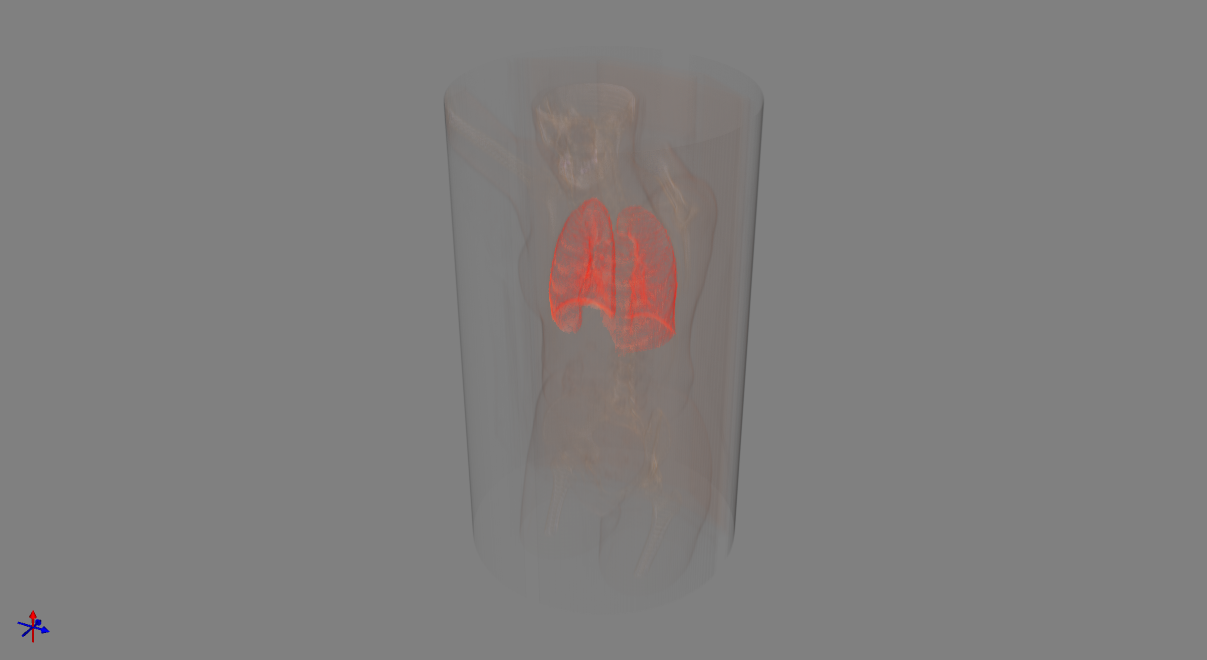
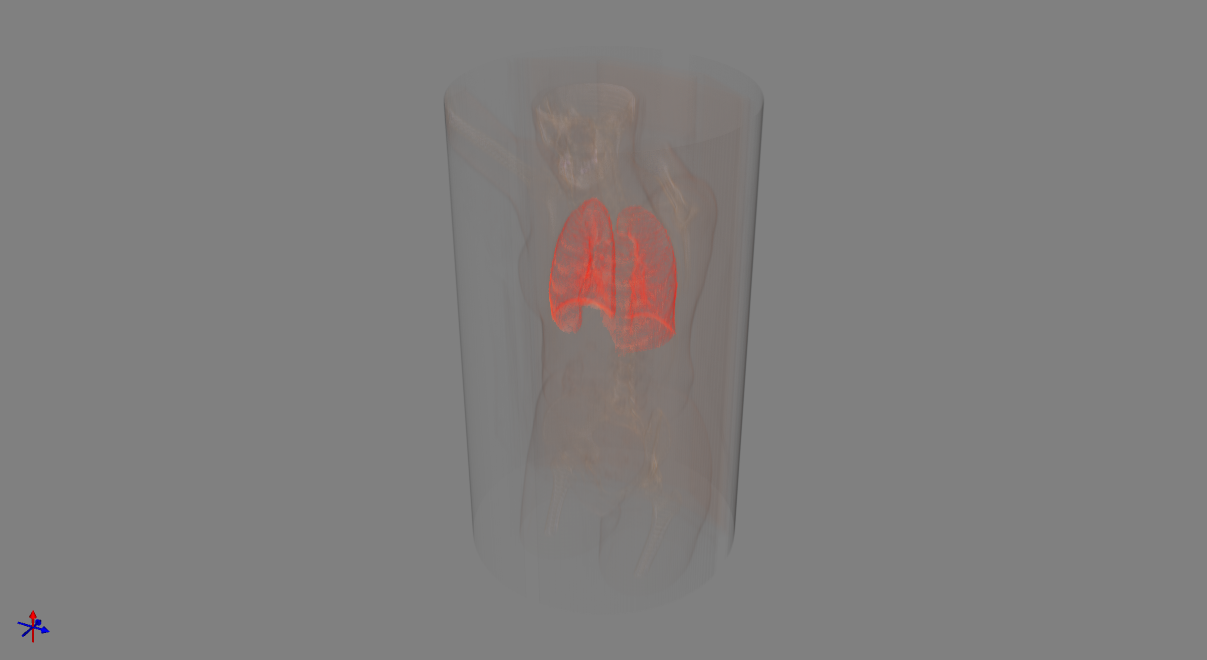

<IPython.core.display.Javascript object>

In [10]:
viewer = view(ct_image, label_image=seg_image)

In [ ]:
viewer.set_image_color_range([-1260, 2385])
viewer.set_label_image_blend(0.90)
viewer.set_image_gradient_opacity(0.45)
viewer.set_image_gradient_opacity_scale(0.55)